In [2]:
print("Data Science is the best")

Data Science is the best


In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('mock_data.tsv',sep='\t')
position = df["End Position(Endgame)"]
df["Auto Points Scored"] = df["Classifier Scored(Auto)"]*3 + df["Overflow Scored(Auto)"]*1 + df["Pattern Correct(Auto)"]*2
df["Teleop Points Scored"] = df["Classifier Scored(Teleop)"]*3 + df["Overflow Scored(Teleop)"]*1 + df["Depot Scored(Teleop)"]*1 + df["Pattern Correct(Teleop)"]*2
df["Endgame Points Scored"] = np.where(position == "No", 0, np.where(position == "P", 5, np.where(position == "Sc", 10, np.where(position == "Hh", 20, 0))))
df["Total Points Scored"] = df["Auto Points Scored"] + df["Teleop Points Scored"] + df["Endgame Points Scored"]
print(df)
df["Auto Number Scored"] = df["Classifier Scored(Auto)"] + df["Overflow Scored(Auto)"] + df["Pattern Correct(Auto)"]
df["Teleop Number Scored"] = df["Classifier Scored(Teleop)"] + df["Overflow Scored(Teleop)"] + df["Depot Scored(Teleop)"]
df["Endgame Number Scored"] = np.where(position == "No", "No", np.where(position == "P", "P", np.where(position == "Sc", "Sc", np.where(position == "Hh", "Hh", "none"))))
df["Classifier Scored POINTS(Teleop)"] = df["Classifier Scored(Teleop)"]*3
df["Overflow Scored POINTS(Teleop)"] = df["Overflow Scored(Teleop)"]*1
df["Depot Scored POINTS(Teleop)"] = df["Depot Scored(Teleop)"]*1

   Scouter Initials  Match Number Robot  Team Number Starting Position  \
0               abc             1    R1         3333                R2   
1                dt             1    R2         6666                R2   
2                dt             1    B1        11111                R1   
3                fu             1    B2         4444                R2   
4                dt             2    R1         3504                R2   
5                dt             2    R2        11111                R1   
6                ty             2    B1         3333                R1   
7                hi             2    B2         4444                R1   
8                dt             3    R1         3333                R1   
9                dt             3    R2        11111                R2   
10               hi             3    B1         3333                R2   
11               pu             3    B2         4444                R2   

    No Show  Moved?  Timer  Classifie

In [7]:
df.columns

Index(['Scouter Initials', 'Match Number', 'Robot', 'Team Number',
       'Starting Position', 'No Show', 'Moved?', 'Timer',
       'Classifier Scored(Auto)', 'Overflow Scored(Auto)',
       'Pattern Correct(Auto)', 'Auto Foul', 'Pickup Location(Teleop)',
       'Classifier Scored(Teleop)', 'Overflow Scored(Teleop)',
       'Depot Scored(Teleop)', 'Pattern Correct(Teleop)',
       'Crossed Field/Played Defense?(Teleop)',
       'Was Robot Defended by Other Alliance?(Teleop)',
       'End Position(Endgame)', 'Died?(Postmatch)',
       'Tipped/Fell Over?(Postmatch)', 'Offense Skill(Postmatch)',
       'Defensive Skill(Postmatch)', 'Yellow/Red Card(Postmatch)',
       'Comments(Postmatch)', 'Auto Points Scored', 'Teleop Points Scored',
       'Endgame Points Scored', 'Total Points Scored', 'Auto Number Scored',
       'Teleop Number Scored', 'Endgame Number Scored',
       'Classifier Scored POINTS(Teleop)', 'Overflow Scored POINTS(Teleop)',
       'Depot Scored POINTS(Teleop)'],
      dt

In [8]:
all_teams = [3333, 6666, 11111, 4444]
new_df = df.loc[df["Team Number"].isin(all_teams)]
print(new_df)

   Scouter Initials  Match Number Robot  Team Number Starting Position  \
0               abc             1    R1         3333                R2   
1                dt             1    R2         6666                R2   
2                dt             1    B1        11111                R1   
3                fu             1    B2         4444                R2   
5                dt             2    R2        11111                R1   
6                ty             2    B1         3333                R1   
7                hi             2    B2         4444                R1   
8                dt             3    R1         3333                R1   
9                dt             3    R2        11111                R2   
10               hi             3    B1         3333                R2   
11               pu             3    B2         4444                R2   

    No Show  Moved?  Timer  Classifier Scored(Auto)  Overflow Scored(Auto)  \
0     False    True      0       

In [9]:
#add team thing
fig = px.box(new_df, x="Team Number", y= "Total Points Scored", title="Total Points Scored per Team")
fig.show()

In [10]:
#add colors, figure out the line separation thing, team thing
fig = px.bar(new_df, x= "Team Number", y=["Classifier Scored(Teleop)", "Overflow Scored(Teleop)", "Depot Scored(Teleop)"], title="Classifier v. Overflow v. Depot Scored(Teleop)")
fig.show()

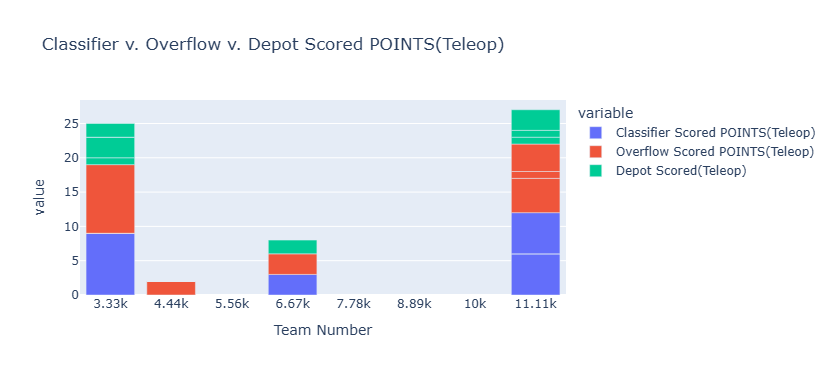

In [26]:
#add colors, figure out the line separation thing, team thing
fig = px.bar(new_df, x= "Team Number", y=["Classifier Scored POINTS(Teleop)", "Overflow Scored POINTS(Teleop)", "Depot Scored(Teleop)"], title="Classifier v. Overflow v. Depot Scored POINTS(Teleop)")
fig.show()

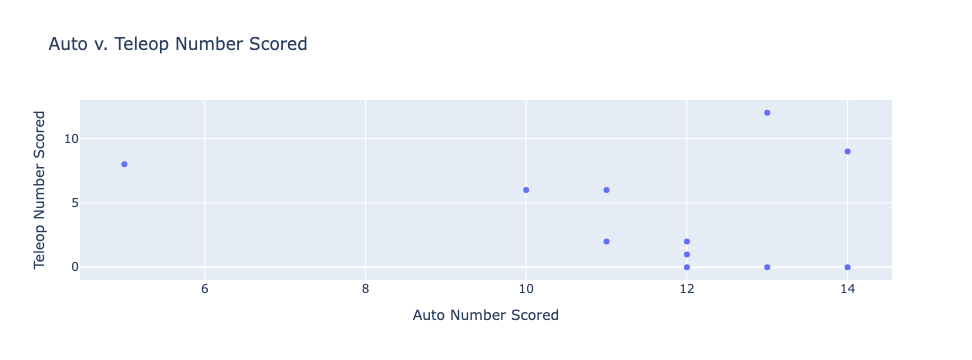

In [28]:
#add team hover thing, colors
fig = px.scatter(new_df, x= "Auto Number Scored", y="Teleop Number Scored", title="Auto v. Teleop Number Scored")
fig.show()